In [1]:
import tensorflow as tf
from tensorflow import keras
import cv2
import numpy as np

(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()  # loads the popular "mnist" training dataset

x_train = x_train/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1
x_test = x_test/255.0  # scales the data. pixel values range from 0 to 255, so this makes it range 0 to 1

11490434/11490434 [==============================] - 0s 0us/step


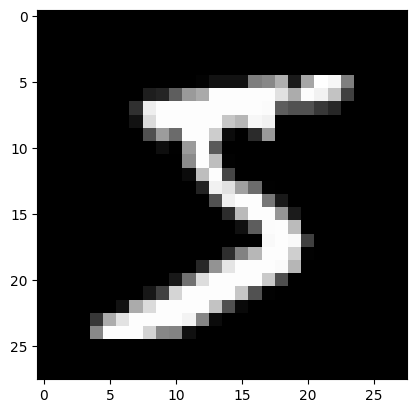

In [2]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap="gray")

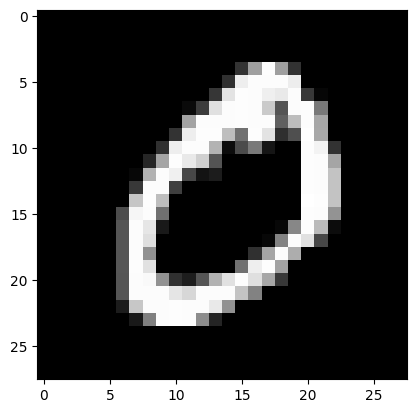

In [3]:
plt.imshow(x_train[1], cmap="gray")

In [4]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [5]:
x_train[0].shape

(28, 28)

In [6]:
encoder_input = keras.Input(shape=(28, 28, 1), name='img')

In [7]:
x = keras.layers.Flatten()(encoder_input)

In [8]:
encoder_output = keras.layers.Dense(64, activation="relu")(x)

In [9]:
encoder = keras.Model(encoder_input, encoder_output, name='encoder')

In [10]:
decoder_input = keras.layers.Dense(64, activation="relu")(encoder_output)

In [11]:
x = keras.layers.Dense(784, activation="relu")(decoder_input)

In [12]:
decoder_output = keras.layers.Reshape((28, 28, 1))(x)

In [19]:
opt =keras.optimizers.Adam(learning_rate=0.001)

In [20]:
autoencoder = keras.Model(encoder_input, decoder_output, name='autoencoder')

In [21]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 28, 28, 1)]       0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 784)               50960     
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 105360 (411.56 KB)
Trainable params: 1053

In [24]:
autoencoder.compile(opt, loss='mse')

In [26]:
epochs=3
for epoch in range(epochs):

    history = autoencoder.fit(
      x_train,
      x_train,
      epochs=1,
      batch_size=32, validation_split=0.10
        )
    autoencoder.save(f"models/AE-{epoch+1}.model")

1688/1688 [==============================] - 7s 4ms/step - loss: 0.0149 - val_loss: 0.0146


In [27]:
example = encoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])

print(example[0].shape)
print(example[0])

1/1 [==============================] - 0s 167ms/step
(64,)
[0.         1.0974709  1.4491124  2.0747566  1.5983399  2.1473212
 0.6761087  1.970624   2.4317153  0.         0.69261837 2.054275
 1.2273415  1.4039694  1.0849471  0.         1.0603923  1.1992844
 0.         2.079622   1.1048932  1.210261   0.8155581  0.8197224
 0.96020114 3.0176172  0.         0.5747781  1.0258327  1.0411869
 0.79888    1.5324984  0.         1.6619682  1.491882   0.6234816
 2.0638292  2.4601774  1.4590405  1.7635089  1.5385993  1.3151172
 1.094815   0.44790664 2.006673   2.3834963  0.42236388 2.2800815
 1.3946719  0.9886496  0.63541496 0.5360265  0.         2.5684495
 2.689315   0.         2.223404   0.47406822 1.8858981  0.8346972
 1.4926958  1.9517527  1.6092769  1.4076892 ]


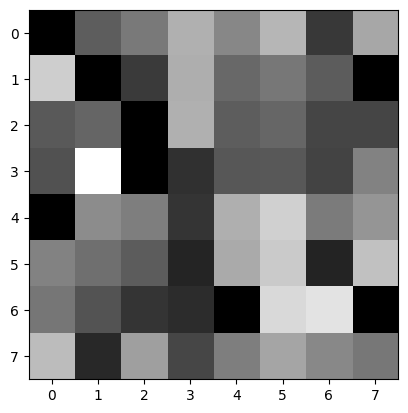

In [28]:
plt.imshow(example[0].reshape((8,8)), cmap="gray")

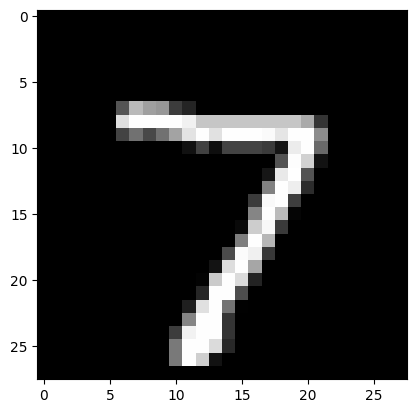

In [29]:
plt.imshow(x_test[0], cmap="gray")

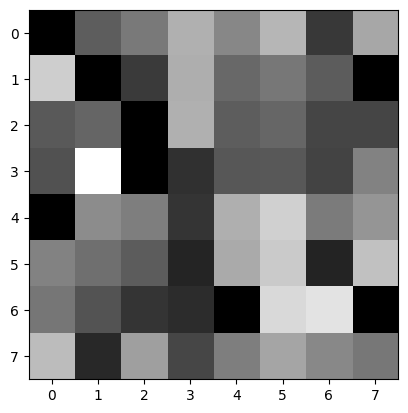

In [30]:
plt.imshow(example[0].reshape((8,8)), cmap="gray")

1/1 [==============================] - 0s 94ms/step


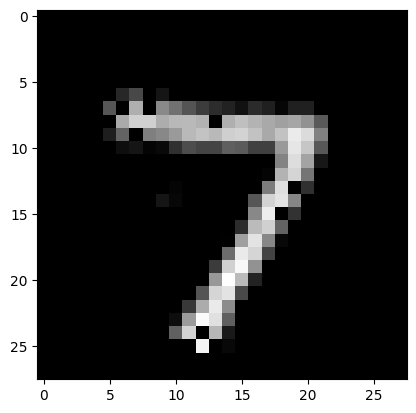

In [31]:
ae_out = autoencoder.predict([ x_test[0].reshape(-1, 28, 28, 1) ])
img = ae_out[0]  # predict is done on a vector, and returns a vector, even if its just 1 element, so we still need to grab the 0th
plt.imshow(ae_out[0], cmap="gray")

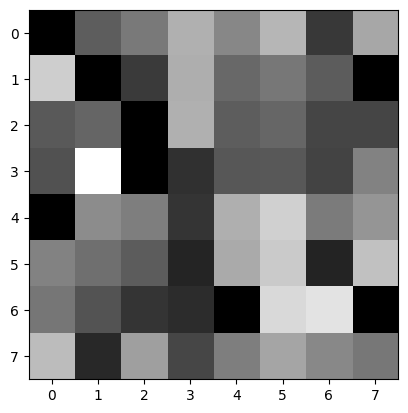

In [32]:
plt.imshow(example[0].reshape((8,8)), cmap="gray")

In [36]:
from google.colab.patches import cv2_imshow
for d in x_test[:5]:  # just show 5 examples, feel free to show all or however many you want!

    ae_out = autoencoder.predict([ d.reshape(-1, 28, 28, 1) ])
    img = ae_out[0]

    cv2_imshow(img)
    cv2_imshow(np.array(d))
    cv2.waitKey(1000)  # wait 1000ms, 1 second, and then show the next.

1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


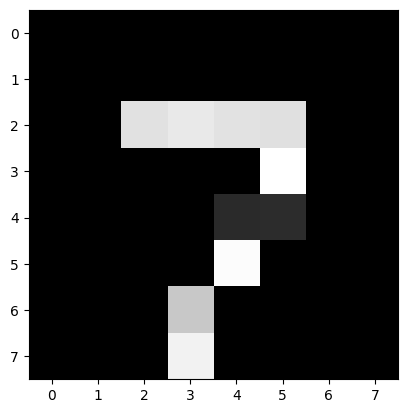

In [37]:
smaller = cv2.resize(x_test[0], (8,8))
back_to_original = cv2.resize(smaller, (28,28))
plt.imshow(smaller, cmap="gray")

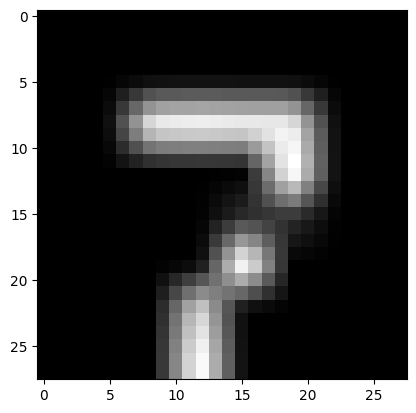

In [38]:
plt.imshow(back_to_original, cmap="gray")